<a href="https://colab.research.google.com/github/CharmStrange/CoLab_data/blob/main/ipynb-majoring/DS/3%EC%B0%A8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제
> ### **패스트 푸드와 당뇨병**
>
> #### **분석 목표** : 패스트 푸드에 포함된, 과도하게 섭취 시 문제가 될 수 있는 영양 성분이 당뇨병과 여러 합병증에 미치는 영향을 알아보고, 영양 성분을 독립 변수로 하여 당뇨 정도나 확률을 예측하는 모델을 제작해 본다.
>
> #### **포인트** : 주요 과잉 영양 성분은 탄수화물, 당, 지방, 나트륨, 콜레스테롤 / 당뇨병과 여러 합병증

## 사용한 데이터셋

### [*Fast Food Nutrition* from [**Kaggle**]](https://www.kaggle.com/datasets/joebeachcapital/fast-food?select=FastFoodNutritionMenuV2.csv)

### [*Diabetes Health Indicators* from [**UCI**]](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)

---

# 준비 단계

### 데이터 불러오기 & 정보 확인

In [1]:
%pip install ucimlrepo

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
df_nutrition = pd.read_csv("/content/FastFoodNutritionMenuV2.csv")
df_nutrition.columns = df_nutrition.columns.str.replace('\n', '')

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

df_diabetes = pd.DataFrame(data=X, columns=cdc_diabetes_health_indicators.variables['name'][1:])
df_diabetes['Diabetes_binary'] = y

In [4]:
# 첫 번째 데이터프레임의 정보 확인
df_nutrition

,Company,Item,Calories,Calories fromFat,Total Fat(g),Saturated Fat(g),Trans Fat(g),Cholesterol(mg),Sodium (mg),Carbs(g),Fiber(g),Sugars(g),Protein(g),Weight WatchersPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230,NaN,10,4.5,0,25,390,25,2,1,11,NaN
1144,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310,NaN,13,6,0,35,540,33,2,1,15,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120,NaN,4,1.5,0,10,230,17,1,1,5,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200,NaN,6,2.5,0,15,370,27,2,2,8,NaN


열 정보

* Company : 기업 명
* Item : 상품 명
* Calories : 열량
* Calories from Fat : 지방의 열량
* Total Fat : 총 지방(g)
* Saturated Fat : 포화지방(g)
* Trans Fat : 트랜스지방(g)
* Cholesterol : 콜레스테롤(mg)
* Sodium : 나트륨(mg)
* Carbs : 탄수화물(g)
* Fiber : 식이섬유(g)
* Sugars : 당(g)
* Protein : 단백질(g)
* Weight Watchers Pnts : 영양 성분 평가 지표

---

In [5]:
# 두 번째 데이터프레임의 정보 확인
df_diabetes

name,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


열 정보

* Diabetes_binary: 당뇨 여부
* HighBP: 고혈압 여부
* HighChol: 고콜레스테롤 여부
* CholCheck: 콜레스테롤 확인 여부
* BMI: 체질량 지수
* Smoker: 흡연 여부
* Stroke: 뇌졸중 여부
* HeartDiseaseorAttack: 심장질환 또는 심근경색 여부
* PhysActivity: 신체 활동 여부
* Fruits: 과일 소비 여부
* Veggies: 채소 소비 여부
* HvyAlcoholConsump: 과도한 알콜 소비 여부
* AnyHealthcare: 건강보험 가입 여부
* NoDocbcCost: 의료 서비스 무료 혜택 여부
* GenHlth: 일반적인 건강 상태
* MentHlth: 정신 건강 상태
* PhysHlth: 신체 건강 상태
* DiffWalk: 보행에 어려움 여부
* Sex: 성별
* Age: 나이 (1-13 카테고리 : 1이면 18-24세, 13이면 80세 이상)
* Education: 교육 수준
* Income: 소득

(0이면 부정, 1이면 긍정)

---

### 완전히 필요 없는 변수는 미리 지워주기

In [6]:
# 일부 열 삭제 : Company, Item, Weight WatchersPnts
df_nutrition.drop(['Company', 'Item', 'Fiber(g)', 'Weight WatchersPnts'], axis=1, inplace=True)
for column in df_nutrition.columns:
  print(column, end=" | ")

Calories | Calories fromFat | Total Fat(g) | Saturated Fat(g) | Trans Fat(g) | Cholesterol(mg) | Sodium (mg) | Carbs(g) | Sugars(g) | Protein(g) | 

In [7]:
# 일부 열 삭제
df_diabetes.drop(['CholCheck', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income'], axis=1, inplace=True)
for column in df_diabetes.columns:
    print(column, end=" | ")

Diabetes_binary | HighBP | HighChol | BMI | Smoker | Stroke | HeartDiseaseorAttack | PhysActivity | Fruits | Veggies | HvyAlcoholConsump | Sex | Age | 

### 데이터 전처리하기

#### 패스트 푸드 영양 성분 데이터셋

In [8]:
df_nutrition = df_nutrition.fillna(0)

#df_nutrition['Saturated Fat(g)'] = pd.to_numeric(df_nutrition['Saturated Fat(g)'].str.replace(r'[^0-9.]', ''), errors='coerce').fillna(0).astype(float)
#df_nutrition['Cholesterol(mg)'] = pd.to_numeric(df_nutrition['Cholesterol(mg)'].replace('\xa0', ''), errors='coerce').fillna(0).astype(float)
#df_nutrition['Sodium (mg)'] = pd.to_numeric(df_nutrition['Sodium (mg)'].replace('\xa0', ''), errors='coerce').fillna(0).astype(float)
#df_nutrition['Sugars(g)'] = pd.to_numeric(df_nutrition['Sugars(g)'].replace('\xa0', ''), errors='coerce').fillna(0).astype(float)

for column in df_nutrition:
    df_nutrition[column] = pd.to_numeric(df_nutrition[column].str.replace(r'[^0-9.]', ''), errors='coerce').fillna(0).astype(float)
    df_nutrition[column] = pd.to_numeric(df_nutrition[column].replace('\xa0', ''), errors='coerce').fillna(0).astype(float)

df_nutrition.isna().sum()

<ipython-input-8-b451fe30bd87>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_nutrition[column] = pd.to_numeric(df_nutrition[column].str.replace(r'[^0-9.]', ''), errors='coerce').fillna(0).astype(float)


Calories            0
Calories fromFat    0
Total Fat(g)        0
Saturated Fat(g)    0
Trans Fat(g)        0
Cholesterol(mg)     0
Sodium (mg)         0
Carbs(g)            0
Sugars(g)           0
Protein(g)          0
dtype: int64

#### 비만 데이터셋

In [9]:
# 이 데이터셋은 누락된 값이 없음
df_diabetes.isna().sum()

name
Diabetes_binary         0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
Sex                     0
Age                     0
dtype: int64

---

# 1단계 : 데이터 탐색

## 패스트 푸드 영양 성분 데이터셋

In [10]:
df_nutrition

,Calories,Calories fromFat,Total Fat(g),Saturated Fat(g),Trans Fat(g),Cholesterol(mg),Sodium (mg),Carbs(g),Sugars(g),Protein(g)
0,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,6.0,12.0
1,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,6.0,15.0
2,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,7.0,25.0
3,390.0,170.0,19.0,8.0,1.0,65.0,920.0,33.0,7.0,22.0
4,510.0,230.0,26.0,12.0,1.5,90.0,1190.0,40.0,9.0,29.0
...,...,...,...,...,...,...,...,...,...,...
1143,230.0,0.0,10.0,4.5,0.0,25.0,390.0,25.0,1.0,11.0
1144,310.0,0.0,13.0,6.0,0.0,35.0,540.0,33.0,1.0,15.0
1145,120.0,0.0,4.0,1.5,0.0,10.0,230.0,17.0,1.0,5.0
1146,200.0,0.0,6.0,2.5,0.0,15.0,370.0,27.0,2.0,8.0


In [11]:
df_nutrition.describe()

,Calories,Calories fromFat,Total Fat(g),Saturated Fat(g),Trans Fat(g),Cholesterol(mg),Sodium (mg),Carbs(g),Sugars(g),Protein(g)
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,283.601916,64.512195,10.980401,3.823606,0.132404,39.682056,421.762195,36.572300,23.452091,8.867596
std,223.079972,113.872460,13.813217,4.966718,0.475993,67.461500,495.768991,32.058319,32.164008,10.944732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.750000,13.000000,2.000000,0.000000
50%,240.000000,0.000000,7.000000,2.500000,0.000000,20.000000,180.000000,32.000000,7.000000,6.000000
75%,390.000000,90.000000,17.000000,6.000000,0.000000,50.000000,660.000000,50.250000,38.000000,13.000000
max,1220.000000,750.000000,98.000000,33.000000,4.500000,575.000000,2890.000000,270.000000,264.000000,71.000000


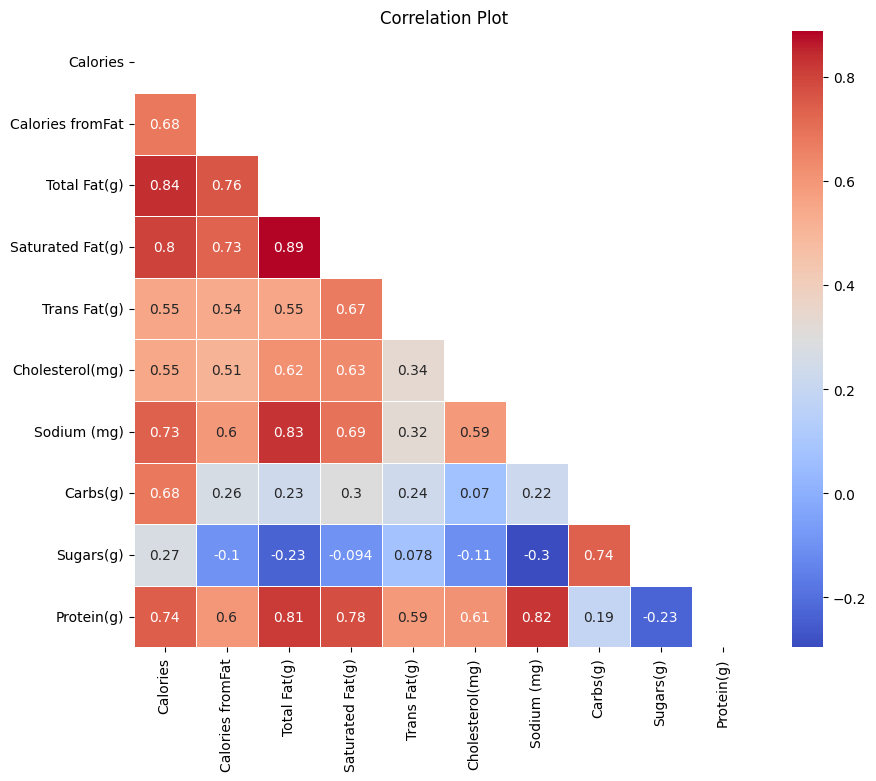

In [12]:
# 상관 관계 시각화
plt.figure(figsize=(10, 8))
mask = np.triu(df_nutrition.corr())
sns.heatmap(df_nutrition.corr(), annot=True, cmap='coolwarm', linewidths=.5, mask=mask)
plt.title('Correlation Plot')
plt.show()

피어슨 상관 계수가 0.8이 넘어가는 변수들의 조합 회귀 곡선 그려보기

<Axes: xlabel='Total Fat(g)', ylabel='Saturated Fat(g)'>

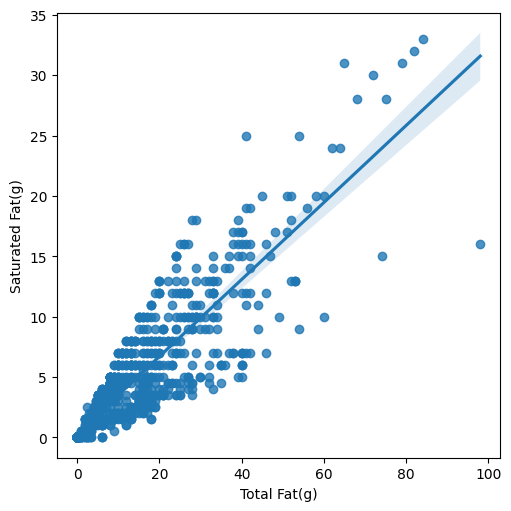

In [13]:
# 0.89
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="Total Fat(g)", y='Saturated Fat(g)', data=df_nutrition, ax=ax)

<Axes: xlabel='Calories', ylabel='Total Fat(g)'>

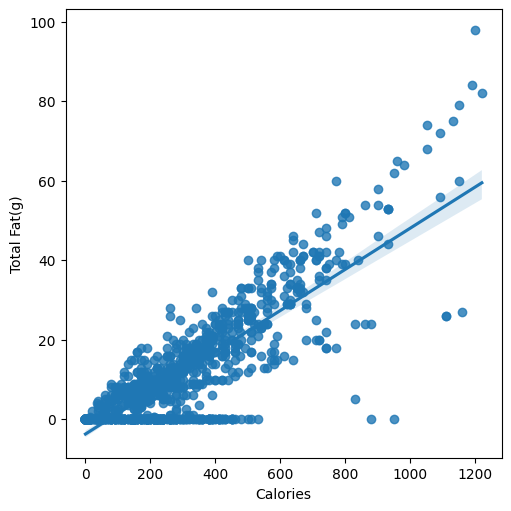

In [14]:
# 0.84
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="Calories", y='Total Fat(g)', data=df_nutrition, ax=ax)

<Axes: xlabel='Total Fat(g)', ylabel='Sodium (mg)'>

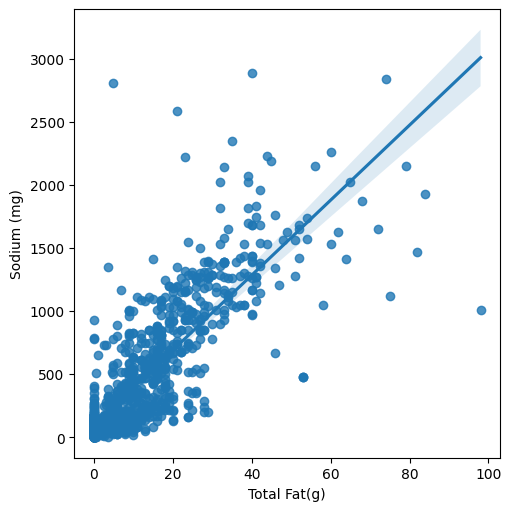

In [15]:
# 0.83
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="Total Fat(g)", y='Sodium (mg)', data=df_nutrition, ax=ax)

<Axes: xlabel='Sodium (mg)', ylabel='Protein(g)'>

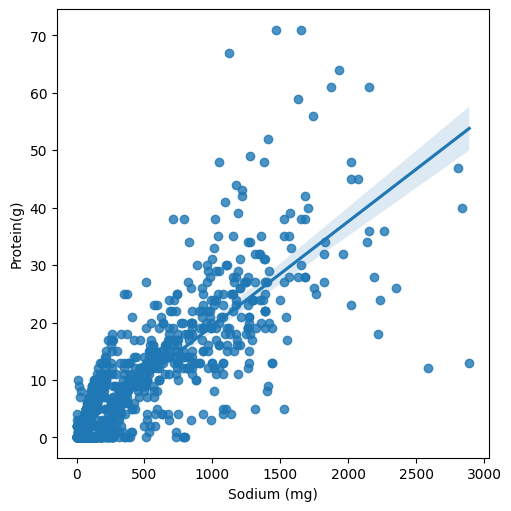

In [16]:
# 0.82
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="Sodium (mg)", y='Protein(g)', data=df_nutrition, ax=ax)

<Axes: xlabel='Total Fat(g)', ylabel='Protein(g)'>

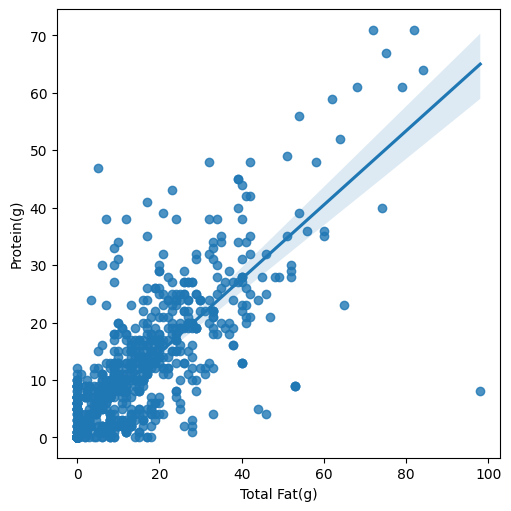

In [17]:
# 0.81
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="Total Fat(g)", y='Protein(g)', data=df_nutrition, ax=ax)

각 변수 간 분포를 산점도로 확인해 본 결과, 대부분의 값 관계가 선형 관계를 이루는 것을 볼 수 있다.

---

## 당뇨병 데이터셋

(당뇨병 데이터셋 변수들의 값은 대부분이 이진 값)

In [18]:
df_diabetes

name,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age
0,0,1,1,40,1,0,0,0,0,1,0,0,9
1,0,0,0,25,1,0,0,1,0,0,0,0,7
2,0,1,1,28,0,0,0,0,1,0,0,0,9
3,0,1,0,27,0,0,0,1,1,1,0,0,11
4,0,1,1,24,0,0,0,1,1,1,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,45,0,0,0,0,1,1,0,1,5
253676,1,1,1,18,0,0,0,0,0,0,0,0,11
253677,0,0,0,28,0,0,0,1,1,0,0,0,2
253678,0,1,0,23,0,0,0,0,1,1,0,1,7


In [19]:
# 당뇨병 있음 데이터프레임 따로, 당뇨병 없음 데이터프레임 따로 분리
df_diabetes_0 = df_diabetes[df_diabetes['Diabetes_binary'] == 0]
df_diabetes_1 = df_diabetes[df_diabetes['Diabetes_binary'] == 1]

print(f"당뇨병 없음 : {len(df_diabetes_0)}개 / 비율 : {round(len(df_diabetes_0)/len(df_diabetes) * 100)}%")
print(f"당뇨병 있음 : {len(df_diabetes_1)}개 / 비율 : {round(len(df_diabetes_1)/len(df_diabetes) * 100)}%\n")
print(f"당뇨병 데이터셋 중, 당뇨병 있음이 {round(len(df_diabetes_1)/len(df_diabetes) * 100)}%, 당뇨병 없음이 {round(len(df_diabetes_0)/len(df_diabetes) * 100)}%")

당뇨병 없음 : 218334개 / 비율 : 86%
당뇨병 있음 : 35346개 / 비율 : 14%

당뇨병 데이터셋 중, 당뇨병 있음이 14%, 당뇨병 없음이 86%


In [20]:
# 각 데이터프레임 변수의 값 분포 정도를 확인
# ex : 당뇨병 있음 데이터프레임의 'HighBP', 'HighChol' ... 등의 변수의 값 분포는 1이 많을 것이다.
# ex : 당뇨병 없음 데이터프레임의 " 1이 적을 것이다.

print(f"당뇨병 없음 : {df_diabetes_0[['HighBP', 'HighChol', 'BMI', 'Sex']].sum()}\n")
print(f"당뇨병 있음 : {df_diabetes_1[['HighBP', 'HighChol', 'BMI', 'Sex']].sum()}\n")

당뇨병 없음 : name
HighBP        82225
HighChol      83905
BMI         6070945
Sex           94771
dtype: int64

당뇨병 있음 : name
HighBP        26604
HighChol      23686
BMI         1129093
Sex           16935
dtype: int64



당뇨병 없음 데이터프레임의 모든 수치가 당뇨병 있음 데이터프레임의 그것들보다 더 크게 나왔다. 이는 표본의 비율 차이가 커서 생기는 현상이라고 생각해서, 다시 분류를 해 보았다.

In [21]:
print(f"당뇨병 없음 데이터프레임의 혈압 높음 비율 : {round(len(df_diabetes_0[df_diabetes_0['HighBP']==1])/len(df_diabetes_0) * 100)}%, 당뇨병 없음 데이터프레임의 콜레스테롤 높음 비율 : {round(len(df_diabetes_0[df_diabetes_0['HighChol']==1])/len(df_diabetes_0) * 100)}%")

print(f"당뇨병 있음 데이터프레임의 혈압 높음 비율 : {round(len(df_diabetes_1[df_diabetes_1['HighBP']==1])/len(df_diabetes_1) * 100)}%, 당뇨병 있음 데이터프레임의 콜레스테롤 높음 비율 : {round(len(df_diabetes_1[df_diabetes_1['HighChol']==1])/len(df_diabetes_1) * 100)}%\n")

당뇨병 없음 데이터프레임의 혈압 높음 비율 : 38%, 당뇨병 없음 데이터프레임의 콜레스테롤 높음 비율 : 38%
당뇨병 있음 데이터프레임의 혈압 높음 비율 : 75%, 당뇨병 있음 데이터프레임의 콜레스테롤 높음 비율 : 67%



즉, 당뇨병 있음 데이터프레임 내 혈압 높음 비율이 75%, 당뇨병 없음 데이터프레임 내 혈압 높음 비율이 38%로, 확실히 당뇨병 있음 데이터프레임의 혈압 높음이 많은 것을 확인할 수 있다.
이는 콜레스테롤 높음도 마찬가지다.

In [22]:
print(f"당뇨병 없음 데이터프레임의 뇌졸중  비율 : {round(len(df_diabetes_0[df_diabetes_0['Stroke']==1])/len(df_diabetes_0) * 100)}%, 당뇨병 없음 데이터프레임의 심장질환 비율 : {round(len(df_diabetes_0[df_diabetes_0['HeartDiseaseorAttack']==1])/len(df_diabetes_0) * 100)}%")

print(f"당뇨병 있음 데이터프레임의 뇌졸중 비율 : {round(len(df_diabetes_1[df_diabetes_1['Stroke']==1])/len(df_diabetes_1) * 100)}%, 당뇨병 있음 데이터프레임의 심장질환 비율 : {round(len(df_diabetes_1[df_diabetes_1['HeartDiseaseorAttack']==1])/len(df_diabetes_1) * 100)}%\n")

당뇨병 없음 데이터프레임의 뇌졸중  비율 : 3%, 당뇨병 없음 데이터프레임의 심장질환 비율 : 7%
당뇨병 있음 데이터프레임의 뇌졸중 비율 : 9%, 당뇨병 있음 데이터프레임의 심장질환 비율 : 22%



역시 당뇨병 있음 데이터프레임 내 뇌졸중 비율과 심장질환 비율이 비만 없음 데이터프레임보다 높은 것을 확인할 수 있다.

In [23]:
print(f"당뇨병 없음 데이터프레임의 남성 비율 : {round(len(df_diabetes_0[df_diabetes_0['Sex']==1])/len(df_diabetes_0) * 100)}%, 당뇨병 없음 데이터프레임의 여성 비율 : {round(len(df_diabetes_0[df_diabetes_0['Sex']==0])/len(df_diabetes_0) * 100)}%")

print(f"당뇨병 있음 데이터프레임의 남성 비율 : {round(len(df_diabetes_1[df_diabetes_1['Sex']==1])/len(df_diabetes_1) * 100)}%, 당뇨병 있음 데이터프레임의 여성 비율 : {round(len(df_diabetes_1[df_diabetes_1['Sex']==0])/len(df_diabetes_1) * 100)}%\n")

당뇨병 없음 데이터프레임의 남성 비율 : 43%, 당뇨병 없음 데이터프레임의 여성 비율 : 57%
당뇨병 있음 데이터프레임의 남성 비율 : 48%, 당뇨병 있음 데이터프레임의 여성 비율 : 52%



당뇨병 있음 데이터프레임이나, 당뇨병 없음 데이터프레임이나 남녀 성별 분포는 고른 것을 확인할 수 있다.

In [24]:
print(f"당뇨병 없음 데이터프레임의 평균 연령 카테고리 : {round(df_diabetes_0['Age'].mean())}")
print(f"당뇨병 있음 데이터프레임의 평균 연령 카테고리 : {round(df_diabetes_1['Age'].mean())}\n")

print(f"당뇨병 없음 데이터프레임의 신체 활동 여부 비율 : {round(len(df_diabetes_0[df_diabetes_0['PhysActivity']==1])/len(df_diabetes_0) * 100)}%, 당뇨병 없음 데이터프레임의 과도한 알콜 섭취 비율 : {round(len(df_diabetes_0[df_diabetes_0['HvyAlcoholConsump']==1])/len(df_diabetes_0) * 100)}%")
print(f"당뇨병 있음 데이터프레임의 신체 활동 여부 비율 : {round(len(df_diabetes_1[df_diabetes_1['PhysActivity']==1])/len(df_diabetes_1) * 100)}%, 당뇨병 있음 데이터프레임의 과도한 알콜 섭취 비율 : {round(len(df_diabetes_1[df_diabetes_1['HvyAlcoholConsump']==1])/len(df_diabetes_1) * 100)}%")


당뇨병 없음 데이터프레임의 평균 연령 카테고리 : 8
당뇨병 있음 데이터프레임의 평균 연령 카테고리 : 9

당뇨병 없음 데이터프레임의 신체 활동 여부 비율 : 78%, 당뇨병 없음 데이터프레임의 과도한 알콜 섭취 비율 : 6%
당뇨병 있음 데이터프레임의 신체 활동 여부 비율 : 63%, 당뇨병 있음 데이터프레임의 과도한 알콜 섭취 비율 : 2%


당뇨병 없음 데이터프레임의 평균 연령은 8이니 55-59세이고, 당뇨병 있음 데이터프레임의 평균 연령은 9이니 60-64세이다.


In [25]:
print(f"당뇨병 없음 데이터프레임의 평균 BMI : {round(df_diabetes_0['BMI'].sum() / len(df_diabetes_0))}")
print(f"당뇨병 있음 데이터프레임의 평균 BMI : {round(df_diabetes_1['BMI'].sum() / len(df_diabetes_1))}\n")

print(f"당뇨병 있음 데이터프레임의 최소 BMI | 최대 BMI : {min(df_diabetes_0['BMI'])} | {max(df_diabetes_0['BMI'])}")
print(f"당뇨병 없음 데이터프레임의 최소 BMI | 최대 BMI : {min(df_diabetes_1['BMI'])} | {max(df_diabetes_1['BMI'])}")

당뇨병 없음 데이터프레임의 평균 BMI : 28
당뇨병 있음 데이터프레임의 평균 BMI : 32

당뇨병 있음 데이터프레임의 최소 BMI | 최대 BMI : 12 | 98
당뇨병 없음 데이터프레임의 최소 BMI | 최대 BMI : 13 | 98


건강한 성인의 경우 `BMI`는 22 내외가 정상이다. (데이터셋 중 최대 BMI가 98이길래, 찾아봤더니 초 고도비만에 키가 작으면 그럴 수 있다고 한다. / `Khalid bin Mohsen Shaari` 이라는 '살아있는 가장 뚱뚱한 인간' 이라고 알려진 사람의 경우 측정된 BMI가 204다.)

---

|데이터프레임|남성 비율|평균 연령|고혈압|고콜레스테롤|뇌졸중|심장질환|과도한 알콜 섭취 여부|평균 BMI|신체 활동 여부|
|---|---|---|---|---|---|---|---|---|---|
|당뇨병 없음|43%|57세|38%|38%|3%|7%|6%|28|78%|
|당뇨병 있음|48%|62세|75%|67%|9%|22%|2%|32|63%

## 패스트 푸드 영양 성분 데이터셋 & 당뇨병 데이터셋의 관계 설정

주목해야 할 부분은 패스트 푸드 영양 성분 데이터셋의 `Total Fat(g)`,	`Saturated Fat(g)`,	`Trans Fat(g)`,	`Cholesterol(mg)`,	`Sodium (mg)`,	`Carbs(g)`,	`Sugars(g)`이며(과잉 영양 성분), 당뇨병 데이터셋의 `Diabetes_binary`,	`HighBP`,	`HighChol`, `BMI`, `Stroke`,	`HeartDiseaseorAttack` 이다.

In [26]:
df_nutrition_overdose = df_nutrition[['Total Fat(g)', 'Saturated Fat(g)', 'Trans Fat(g)', 'Cholesterol(mg)', 'Sodium (mg)', 'Carbs(g)', 'Sugars(g)']]
df_nutrition_overdose

,Total Fat(g),Saturated Fat(g),Trans Fat(g),Cholesterol(mg),Sodium (mg),Carbs(g),Sugars(g)
0,9.0,3.5,0.5,25.0,520.0,31.0,6.0
1,12.0,6.0,0.5,40.0,750.0,33.0,6.0
2,23.0,11.0,1.5,80.0,1150.0,34.0,7.0
3,19.0,8.0,1.0,65.0,920.0,33.0,7.0
4,26.0,12.0,1.5,90.0,1190.0,40.0,9.0
...,...,...,...,...,...,...,...
1143,10.0,4.5,0.0,25.0,390.0,25.0,1.0
1144,13.0,6.0,0.0,35.0,540.0,33.0,1.0
1145,4.0,1.5,0.0,10.0,230.0,17.0,1.0
1146,6.0,2.5,0.0,15.0,370.0,27.0,2.0


In [28]:
df_diabetes[['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack']]

name,Diabetes_binary,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack
0,0,1,1,40,0,0
1,0,0,0,25,0,0
2,0,1,1,28,0,0
3,0,1,0,27,0,0
4,0,1,1,24,0,0
...,...,...,...,...,...,...
253675,0,1,1,45,0,0
253676,1,1,1,18,0,0
253677,0,0,0,28,0,0
253678,0,1,0,23,0,0


---

# 2단계 : 데이터 분석

## ...

---

# 3단계 :

## ...

---

# 결론

## ...